In [1]:
%matplotlib inline

from HeaderP import *
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
plt.rcParams.keys()
plt.rc('font', family='serif')
params = {
   'axes.labelsize': 30,
   'axes.linewidth': 1.5,
   'legend.fontsize': 25,
   'legend.frameon': False,
   'lines.linewidth': 2,
   'xtick.direction': 'in',
   'xtick.labelsize': 25,
   'xtick.major.bottom': True,
   'xtick.major.pad': 10,
   'xtick.major.size': 10,
   'xtick.major.width': 1,
   'xtick.minor.bottom': True,
   'xtick.minor.pad': 3.5,
   'xtick.minor.size': 5,
   'xtick.minor.top': True,
   'xtick.minor.visible': True,
   'xtick.minor.width': 1,
   'xtick.top': True,
   'ytick.direction': 'in',
   'ytick.labelsize': 25,
   'ytick.major.pad': 10,
   'ytick.major.size': 10,
   'ytick.major.width': 1,
   'ytick.minor.pad': 3.5,
   'ytick.minor.size': 5,
   'ytick.minor.visible': True,
   'ytick.minor.width': 1,
   'ytick.right': True,
   'figure.figsize': [10,10], # instead of 4.5, 4.5
   'savefig.format': 'eps',
   }
plt.rcParams.update(params)


/Users/lucy/anaconda3/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence
/Users/lucy/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:18: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Iterable
/Users/lucy/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:16: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Mapping, namedtuple, defaultdict, Sequence
/Users/lucy/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module 

In [8]:

def calcgrad(age,abund,age_err,abund_err):
    sampsize=50
    plt.errorbar(age,abund,fmt='k.',markersize=5,alpha=0.5)
    zs=np.zeros(sampsize)
    bs=np.zeros(sampsize)
    for i in trange(sampsize):
        newage=np.array([np.random.normal(age[k], age_err[k],1)[0] for k in range(len(age))])
        newabund=np.array([np.random.normal(abund[k], abund_err[k],1)[0] for k in range(len(abund))])
        plt.scatter(newage,newabund,s=1)
        fits=np.polyfit(newage,newabund,1,w=1/age_err**2)
        p=np.poly1d(fits)
        plt.plot(newage,p(newage),'r-',alpha=0.5)
        zs[i] = fits[0]
        bs[i] = fits[1]
    fits=np.polyfit(age,abund,1)
    p=np.poly1d(fits)
    plt.plot(age,p(age),'k-',alpha=1,linewidth=2)
    plt.xlim([0,10])
    print('new slopes',np.mean(zs),np.mean(bs))
    print('orginal slope',fits)
    return fits[0],np.std(zs),fits[1],np.std(bs)


def getgrad(df_abun_st_ha,df_abun_st_la):
    abun_apog=['M_H','C_FE','N_FE','O_FE','NA_FE','MG_FE','AL_FE','SI_FE','S_FE','K_FE','CA_FE','TI_FE',
           'V_FE','MN_FE','NI_FE','P_FE','CR_FE','CO_FE','RB_FE']

    abun_apog_err=[i+'_ERR' for i in abun_apog]

    abund={'C_FE':'[CI/','MG_FE':'[MgI/','AL_FE':'[AlI/','SI_FE':'[SiI/','S_FE':'[ScI/',
       'CA_FE':'[CaI/','TI_FE':'[TiI/','CR_FE':'[CrI/','MN_FE':'[MnI/','CO_FE':'[CoI/',
       'NI_FE':'[NiI/','CU_FE':'[CuI/','O_FE':'[O/','NA_FE':'[Na/','K_FE':'[K/','V_FE':'[V/',
      'P_FE':'[P/','RB_FE':'[Rb/','N_FE':'[N/','M_H':'[Fe/'}

    Abunname=[]
    grad_la=[]
    grad_la_err=[]
    
    grad_ha=[]
    grad_ha_err=[]
    plt.figure(figsize=(22.5,25))
    for i in range(1,len(abun_apog)):
        clear_output(wait = True)
        print(abun_apog[i])
        df_plot_ha=df_plot_ha.reset_index(drop=True)
        df_plot_la=df_plot_la.reset_index(drop=True)
    
        if len(df_plot_la)==0 or len(df_plot_ha)==0:
            continue

        z_la,z_la_err,b_la,b_la_err=calcgrad(df_plot_la['Age'].values,df_plot_la[abun_apog[i]].values,
                         df_plot_la['Age_err'].values,df_plot_la[abun_apog[i]+'_ERR'].values)
        z_ha,z_ha_err,b_ha,b_ha_err=calcgrad(df_plot_ha['Age'].values,df_plot_ha[abun_apog[i]].values,
                         df_plot_ha['Age_err'].values,df_plot_ha[abun_apog[i]+'_ERR'].values)
        
        plt.subplot(5,4,i+1)
        plt.errorbar(df_plot_la['Age'],df_plot_la[abun_apog[i]].values,yerr=df_plot_la[abun_apog[i]+'_ERR'].values,
                     fmt='bo',alpha=0.05,label='low-$\\alpha$',markersize=1)
        plt.errorbar(df_plot_ha['Age'],df_plot_ha[abun_apog[i]].values,yerr=df_plot_ha[abun_apog[i]+'_ERR'].values,
                     fmt='ro',alpha=0.05,label='high-$\\alpha$',markersize=1)
        plt.plot(df_plot_la['Age'],z_la*df_plot_la['Age']+b_la,'b--',linewidth=5)
        plt.plot(df_plot_ha['Age'],z_ha*df_plot_ha['Age']+b_ha,'r--',linewidth=5)
        plt.ylabel(abund[abun_apog[i]]+'Fe]')
        plt.xlabel('Age [Gyr]')
        Abunname.append(abund[abun_apog[i]]+'Fe]')
        grad_la.append(z_la)
        grad_la_err.append(z_la_err)
        grad_ha.append(z_ha)
        grad_ha_err.append(z_ha_err)
        
 
    # For Fe
    df_plot_ha=df_plot_ha.reset_index(drop=True)
    df_plot_la=df_plot_la.reset_index(drop=True)
    
    df_plot_la=df_plot_la.sort_values(by=['Age'])
    df_plot_ha=df_plot_ha.sort_values(by=['Age'])
    
    z_la,z_la_err,b_la,b_la_err=calcgrad(df_plot_la['Age'].values,df_plot_la['M_H'].values,
                         df_plot_la['Age_err'].values,df_plot_la['M_H_ERR'].values)
    z_ha,z_ha_err,b_ha,b_ha_err=calcgrad(df_plot_ha['Age'].values,df_plot_ha['M_H'].values,
                         df_plot_ha['Age_err'].values,df_plot_ha['M_H_ERR'].values)
    
    plt.subplot(5,4,1)
    plt.errorbar(df_plot_la['Age'],df_plot_la['M_H'],yerr=df_plot_la['M_H_ERR'],fmt='bo',
                 alpha=0.05,label='low-$\\alpha$',markersize=1)
    plt.errorbar(df_plot_ha['Age'],df_plot_ha['M_H'],yerr=df_plot_ha['M_H_ERR'],fmt='ro',
                 alpha=0.05,label='high-$\\alpha$',markersize=1)
    plt.plot(df_plot_la['Age'],z_la*df_plot_la['Age']+b_la,'b--',linewidth=5)
    plt.plot(df_plot_ha['Age'],z_ha*df_plot_ha['Age']+b_ha,'r--',linewidth=5)
        
    Abunname.append('Fe')
    plt.ylabel('Fe')
    plt.xlabel('Age [Gyr]')
    grad_la.append(z_la)
    grad_la_err.append(z_la_err)
    grad_ha.append(z_ha)
    grad_ha_err.append(z_ha_err)
        
        
    # for C/N
    df_plot_ha['C_N']=df_plot_ha['C_FE']-df_plot_ha['N_FE']
    df_plot_ha['C_N_ERR']=np.sqrt(df_plot_ha['C_FE_ERR']**2.+df_plot_ha['N_FE_ERR']**2.)
    df_plot_ha=df_plot_ha.reset_index(drop=True)
    
    df_plot_la['C_N']=df_plot_la['C_FE']-df_plot_la['N_FE']
    df_plot_la['C_N_ERR']=np.sqrt(df_plot_la['C_FE_ERR']**2.+df_plot_la['N_FE_ERR']**2.)
    df_plot_la=df_plot_la.reset_index(drop=True)
    
    z_la,z_la_err,b_la,b_la_err=calcgrad(df_plot_la['Age'].values,df_plot_la['C_N'].values,
                         df_plot_la['Age_err'].values,df_plot_la['C_N_ERR'].values)
    z_ha,z_ha_err,b_ha,b_ha_err=calcgrad(df_plot_ha['Age'].values,df_plot_ha['C_N'].values,
                         df_plot_ha['Age_err'].values,df_plot_ha['C_N_ERR'].values)
    
    plt.subplot(5,4,20)
    plt.errorbar(df_plot_la['Age'],df_plot_la['C_N'],yerr=df_plot_la['C_N_ERR'],fmt='bo',
                 alpha=0.05,label='low-$\\alpha$',markersize=1)
    plt.errorbar(df_plot_ha['Age'],df_plot_ha['C_N'],yerr=df_plot_ha['C_N_ERR'],fmt='ro',
                 alpha=0.05,label='high-$\\alpha$',markersize=1)
    plt.plot(df_plot_la['Age'],z_la*df_plot_la['Age']+b_la,'b--',linewidth=5)
    plt.plot(df_plot_ha['Age'],z_ha*df_plot_ha['Age']+b_ha,'r--',linewidth=5)
    
    Abunname.append('[C/N]')
    plt.ylabel('[C/N]')
    plt.xlabel('Age [Gyr]')
    grad_la.append(z_la)
    grad_la_err.append(z_la_err)
    grad_ha.append(z_ha)
    grad_ha_err.append(z_ha_err)
    plt.tight_layout()
    return grad_la, grad_la_err, grad_ha, grad_ha_err, Abunname


In [3]:
abun_apog=['M_H','C_FE','N_FE','O_FE','NA_FE','MG_FE','AL_FE','SI_FE','S_FE','K_FE','CA_FE','TI_FE',
           'V_FE','MN_FE','NI_FE','P_FE','CR_FE','CO_FE','ALPHA_M']

df_CM=pd.read_pickle('CannonDR16_cut.pkl')
for i in abun_apog:
    df_CM=df_CM.loc[abs(df_CM[i])<5]
df_CM=df_CM.reset_index(drop=True)
print('before cutting:',len(df_CM))

# get red clump stars
df=df_CM.loc[df_CM['DP']>230]




before cutting: 64399


In [4]:
df=df.loc[df['SNR']>150].reset_index(drop=True)
df=df.loc[df['M_H_ERR']<0.03].reset_index(drop=True)


In [5]:
high_alpha=df.loc[df['hi_low_line']==1]
low_alpha=df.loc[df['hi_low_line']==0]

df_abun_st_ha=high_alpha.loc[abs(high_alpha['M_H'])<0.05]
df_abun_st_la=low_alpha.loc[abs(low_alpha['M_H'])<0.05]
#df_abun_st_ha=high_alpha
#df_abun_st_la=low_alpha

df_abun_st_ha=df_abun_st_ha.loc[abs(df_abun_st_ha['Age'])<10]
#df_abun_st_ha=df_abun_st_ha.loc[abs(df_abun_st_ha['Age'])>4]
df_abun_st_la=df_abun_st_la.loc[abs(df_abun_st_la['Age'])<10]

print(len(df_abun_st_ha),len(df_abun_st_la))

df_abun_st_la.to_pickle('slopeinvest_Melissa.pkl')


255 1819


In [10]:
def calcgrad(age,abund,age_err,abund_err):
    sampsize=100
    plt.errorbar(age,abund,fmt='k.',markersize=5)
    zs=np.zeros(sampsize)
    bs=np.zeros(sampsize)
    for i in trange(sampsize):
        newage=np.array([np.random.normal(age[k], age_err[k],1)[0] for k in range(len(age))])
        newabund=np.array([np.random.normal(abund[k], abund_err[k],1)[0] for k in range(len(abund))])
        #newabund=newabund[m]
        plt.scatter(newage,newabund,s=1,c='r')
        fits=np.polyfit(newage,newabund,1,w=1/age_err**2)
        p=np.poly1d(fits)
        plt.plot(newage,p(newage),'g-',alpha=0.5)
        zs[i] = fits[0]
        bs[i] = fits[1]
    fits=np.polyfit(age,abund,1)
    p=np.poly1d(fits)
    plt.plot(age,p(age),'k-',alpha=1,linewidth=2)
    plt.xlim([3,4.5])
    print('new slopes',np.mean(zs),np.mean(bs))
    print('orginal slope',fits)
    return zs,bs

  3%|▎         | 3/100 [00:00<00:04, 24.17it/s]

255


100%|██████████| 100/100 [00:03<00:00, 25.69it/s]


new slopes -0.0028299694733122127 0.15583768238030937
orginal slope [-0.00923443  0.18022737]
-0.0028299694733122127 0.00589792282798179


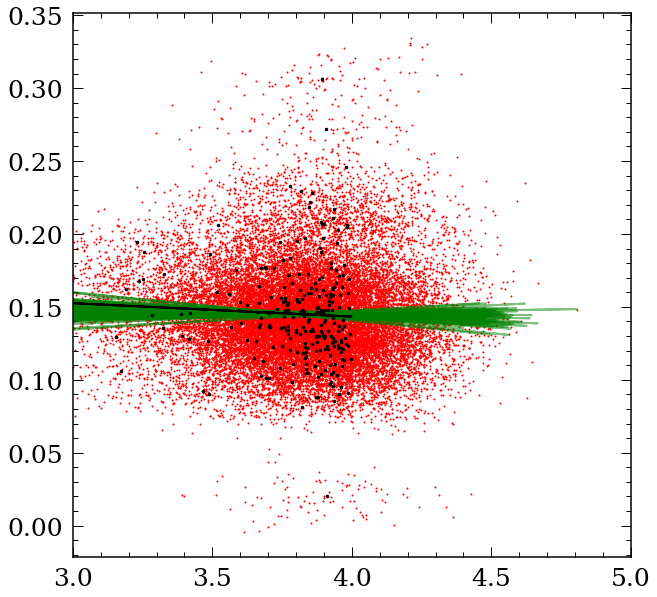

In [159]:
testele='MG_FE'
df_abun_st_ha=df_abun_st_ha.reset_index(drop=True)
print(len(df_abun_st_ha))
zs,bs=calcgrad(df_abun_st_ha['LogAge'],df_abun_st_ha[testele],
               np.sqrt(df_abun_st_ha['LogAge_err']**2+0.2**2),df_abun_st_ha[testele+'_ERR'])
print(np.mean(zs),np.std(zs))

  1%|          | 1/100 [00:00<00:17,  5.67it/s]

1819


100%|██████████| 100/100 [00:15<00:00,  6.26it/s]


new slopes 0.033832922243004035 -0.10791465089260292
orginal slope [ 0.06688116 -0.22487744]
0.033832922243004035 0.001793290037211507


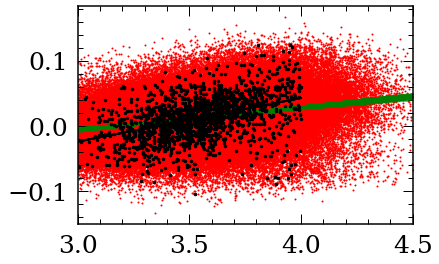

In [11]:
testele='MG_FE'
df_abun_st_la=df_abun_st_la.reset_index(drop=True)
print(len(df_abun_st_la))
zs,bs=calcgrad(df_abun_st_la['LogAge'],df_abun_st_la[testele],
               np.sqrt(df_abun_st_la['LogAge_err']**2+0.2**2),df_abun_st_la[testele+'_ERR'])
print(np.mean(zs),np.std(zs))


  0%|          | 0/100 [00:00<?, ?it/s]

1819


100%|██████████| 100/100 [00:27<00:00,  3.66it/s]


new slopes -0.0026736168118071217 0.013172065464146065
orginal slope [-0.00659782  0.01955111]
-0.0026736168118071217 0.0010994858569232347


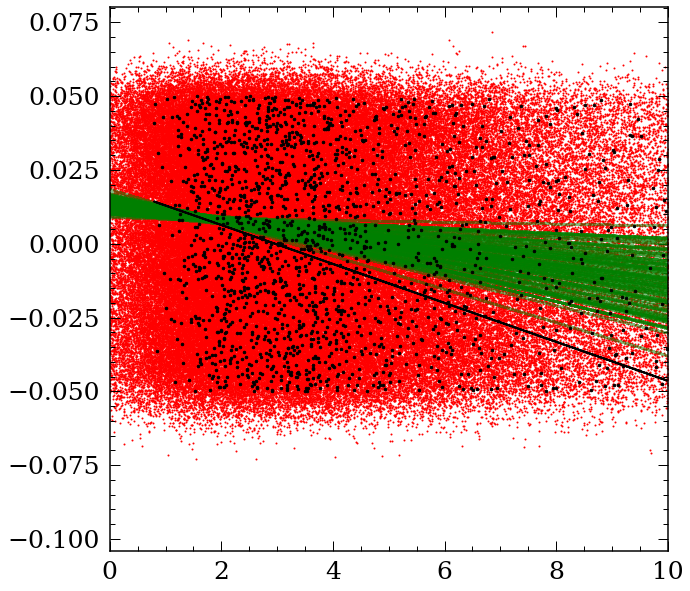

In [148]:
testele='M_H'
df_abun_st_la=df_abun_st_la.reset_index(drop=True)
print(len(df_abun_st_la))
zs,bs=calcgrad(df_abun_st_la['Age'],df_abun_st_la[testele],df_abun_st_la['Age_err'],df_abun_st_la[testele+'_ERR'])
print(np.mean(zs),np.std(zs))

0.010937304882777905 0.0010299250453662903


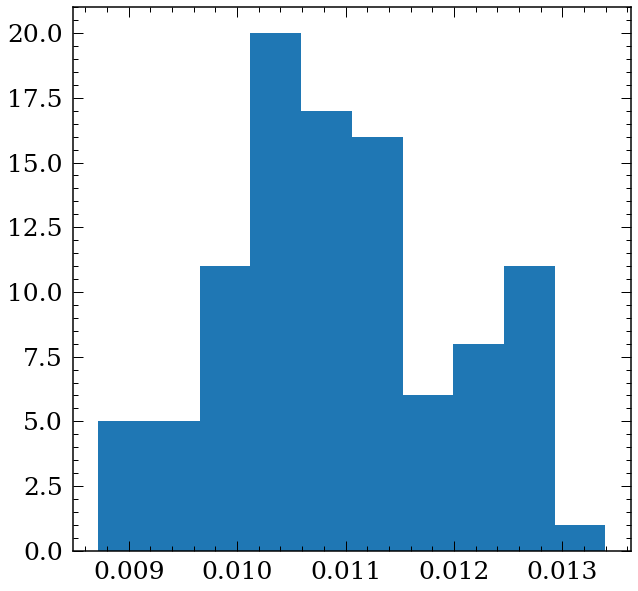

In [74]:
plt.hist(zs)
print(np.mean(zs),np.std(zs))

In [27]:
age=df_abun_st_la['Age'].values
age_err=df_abun_st_la['Age_err'].values
newage=np.array([np.random.normal(age[k], age_err[k],1)[0] for k in range(len(age))])


(array([  0.,   0., 838., 720., 210.,  51.,   0.,   0.,   0.]),
 array([-5.        , -2.22222222,  0.55555556,  3.33333333,  6.11111111,
         8.88888889, 11.66666667, 14.44444444, 17.22222222, 20.        ]),
 <a list of 9 Patch objects>)

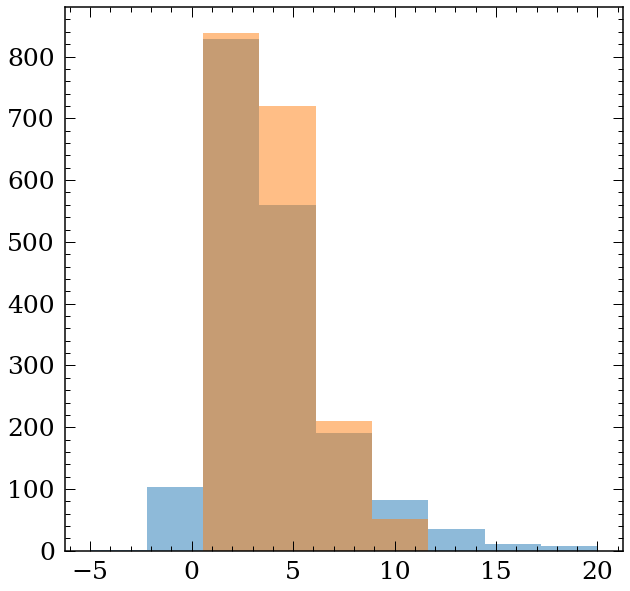

In [32]:
plt.hist(newage,alpha=0.5,bins=np.linspace(-5,20,10))
plt.hist(age,alpha=0.5,bins=np.linspace(-5,20,10))

7.434255564286542e-05


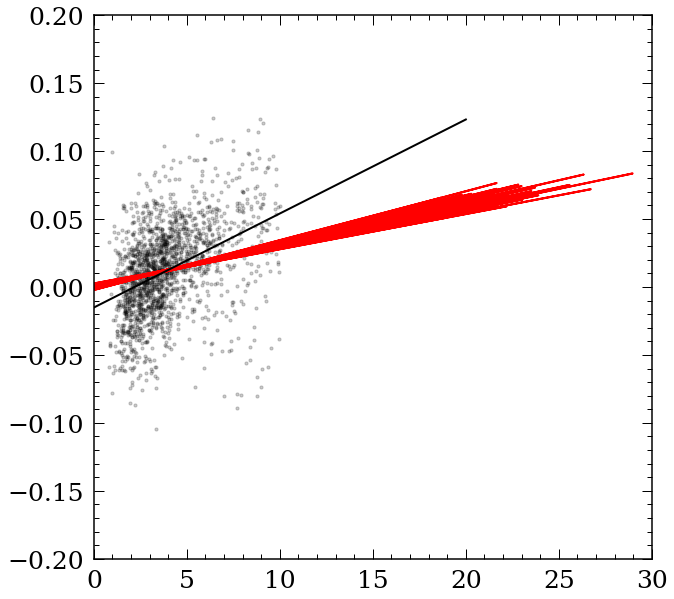

In [51]:
import pandas as pd 
import numpy as np
age = df_abun_st_la['Age'].values
age_err = df_abun_st_la['Age_err'].values
mgfe = df_abun_st_la['MG_FE'].values
mgfe_err = df_abun_st_la['MG_FE_ERR'].values
member = df_abun_st_la['hi_low_line']
high = member == True
low = member == False

#just do the test for the low alpha sequence 
#read in the high and low here however
Xh = age[high]
Yh = mgfe[high]
X = age[low]
Y = mgfe[low]
Xerr = age_err[low]
Yerr = mgfe_err[low]

# calculate reference slope that you will report errors around
z_ref = np.polyfit(X, Y, 1)
p_ref = np.poly1d(z_ref)
slope_ref = p_ref[0]

# generate new vectors drawing from errors 
slopeall = []
plt.figure()
# do 100 draws from the error distribution of the stars and calculate the +/- error 
#note can rework to do this faster without the for loop,
#by putting the number 100 in the random.normal function and working with the arrays
for j in range(0,100):
  Xnew = np.hstack(([np.random.normal(x, x_err, 1) for x, x_err in zip(X, Xerr)]))
  Ynew = np.hstack(([np.random.normal(y, y_err, 1) for y, y_err in zip(Y, Yerr)]))
  Xlow = Xnew
  Ylow = Ynew
#line fit to new data below 
  z = np.polyfit(Xlow, Ylow, 1)
  p = np.poly1d(z)
  plt.plot(Xlow, p(Xlow), c = 'r') 
  slopeall.append(p[0])
  j = j+1
# plot the result as sanity check and the slope is:
#slope_ref_val +/- upp, low  dex/Gyr

xp = np.linspace(0, 20, 100)
plt.scatter(X,Y, c = 'k', alpha=0.2,s=10)
plt.plot(xp, p_ref(xp) , c = 'k') 

meanval, dispval = np.mean(slopeall), np.std(slopeall)

#get the upper and lower 1-sigma deviations around the reference slope
upp = round(dispval - (slope_ref -meanval),3)
low = round(dispval + (slope_ref -meanval),3)
slope_ref_val = round(slope_ref,3)

#print the slope and error on the example figure
plt.xlim(0,30)
plt.ylim(-0.2,0.2)
print(np.mean(slopeall),)
#show()